<a href="https://colab.research.google.com/github/tgusmao/programacao_ds/blob/master/TrabalhoPratico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho Prático de Programação para Ciências de Dados**

Dupla: 
*   Tammy Hikari Yanai Gusmão
*   Thalita Naiara Alves


Trabalho Prático para obtenção de nota na disciplina de Programação para Ciências de Dados - Turma 1 de 2020.

##Importação da Base de Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Iniciando abaixo a leitura do arquivo CSV local (localizado no Google Drive)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_original = pd.read_csv('/content/drive/Shared drives/trabalhoPratico_programacaoDS/dados-curso-completo.csv', sep = ',', skiprows = 0, encoding = 'utf-8')

In [52]:
#cópia da base original
df_copia_original = df_original.copy()

##Resumo do dataset original



A base de dados contém informações sobre tuítes sobre a COVID-19, postados durante o primeiro semestre do ano de 2020. A base foi levemente pré-processada anteriormente pelo professor da disciplina.  

In [4]:
qntd_linhas = df_original.shape[0]
qntd_colunas = df_original.shape[1]
print('Quantidade de linhas: ', qntd_linhas)
print('Quantidade de colunas: ', qntd_colunas)

Quantidade de linhas:  1658825
Quantidade de colunas:  13


Como pode ser visto acima, o atributo *shape* retornou uma tupla contendo a quantidade de linhas e colunas que constituem a base: 1.658.825 linhas e 13 colunas. 

Abaixo temos a lista dos nomes das colunas existentes:

In [5]:
for col in df_original.columns:
  print(col)

data
usuario
apelido
texto
retweet
seguidores
idioma
lugar
pais
sigla
latitude
longitude
hashtags


Como pode ser observado abaixo, os tipos de variáveis que consistem o dataframe são *object*, *int64* e *float64*. As colunas com tipo *object* são aquelas com dados textuais. As colunas com tipo *int64* são as que contém dados quantitativos. As de tipo *float64* contém dados de números quebrados. 

In [6]:
df_original.dtypes

data           object
usuario        object
apelido        object
texto          object
retweet         int64
seguidores      int64
idioma         object
lugar          object
pais           object
sigla          object
latitude      float64
longitude     float64
hashtags       object
dtype: object

In [7]:
df_original.isnull().sum()

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

In [13]:
#arrays com as quantidades de células não nulas e nulas, respectivamente, 
#de cada coluna que apresenta valores nulos
qntd_naonulos = [df_original.usuario.notnull().sum(),df_original.sigla.notnull().sum(),df_original.lugar.notnull().sum(),
           df_original.pais.notnull().sum(), df_original.latitude.notnull().sum(), 
           df_original.longitude.notnull().sum()]

qntd_nulos = [df_original.usuario.isnull().sum(), df_original.sigla.isnull().sum(), df_original.lugar.isnull().sum(),
                 df_original.pais.isnull().sum(), df_original.latitude.isnull().sum(), 
                 df_original.longitude.isnull().sum()]

#Array com labels para os gráficos a seguir
labels_valores_ausentes = ['Usuário', 'Sigla', 'Lugar', 'País', 'Latitude', 'Longitude']

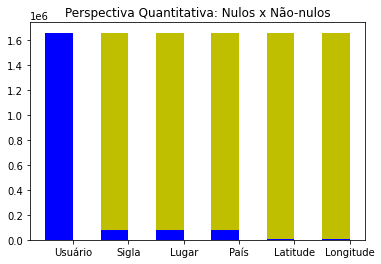

In [16]:
# Range com a quantidade de itens das barras
x_pos = np.arange(len(qntd_naonulos))

first_bar = plt.bar(x_pos, qntd_naonulos, 0.5, color='b')
second_bar = plt.bar(x_pos, qntd_nulos, 0.5, color='y', bottom=qntd_naonulos)
# Definir posição e labels no eixo X
plt.xticks(x_pos+0.25, (labels_valores_ausentes))

plt.title("Perspectiva Quantitativa: Nulos x Não-nulos")
plt.savefig('qntd_nulos_naoNulos_barchar.png')
plt.show()

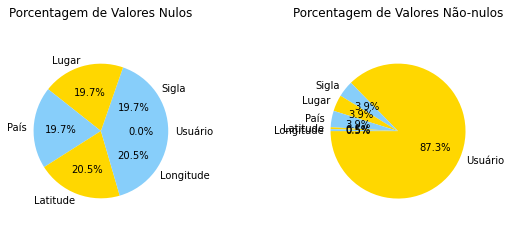

In [18]:
# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da figure
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(qntd_nulos, labels=labels_valores_ausentes,
                    autopct='%1.1f%%', colors=['gold', 'lightskyblue'])

# Define o título deste gráfico
eixos[0].set_title('Porcentagem de Valores Nulos')
# Deixa os dois eixos iguais, fazendo com que o gráfico mantenha-se redondo
eixos[0].axis('equal')

# Idem a acima, para o segundo gráfico de pizza
pie_2 = eixos[1].pie(qntd_naonulos, labels=labels_valores_ausentes,
                    autopct='%1.1f%%', startangle=180, colors=['gold', 'lightskyblue'])
eixos[1].set_title('Porcentagem de Valores Não-nulos')
plt.axis('equal')

# Ajusta o espaço entre os dois gráficos
plt.subplots_adjust(wspace=1)
plt.savefig('qntd_nulos_naoNulos_piechar.png')
plt.show()

Levando em consideração o achado acima, faz-se necessário o preenchimento apropriado para eliminar os espaços vazios presentes no dataset. Esta atividade é realizada na seção seguinte (Tratamento de Dados).

No quesito idiomas, temos as seguintes ocorrências:


In [83]:
#array
l = df_original['idioma'].value_counts().to_frame()
l['sigla_idioma'] = l.index

In [85]:
lista_idiomas = []
count_idiomas_unicos = []

for index, row in l.iterrows():
  lista_idiomas.append(row['sigla_idioma'])
  count_idiomas_unicos.append(row['idioma'])

In [27]:
#Gerador de cores aleatórias para os gráficos.
import matplotlib.colors as pltc
from random import sample
todas_as_cores = [k for k,v in pltc.cnames.items()]

fracs = np.array([600, 179, 154, 139, 126, 1185])
cores = sample(todas_as_cores, len(fracs))

Text(0.5, 1.0, 'Idiomas registrados')

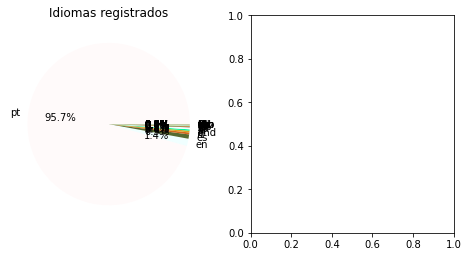

In [89]:
# Criação da figure com uma linha e duas colunas. Figsize define o tamanho da figure
fig, eixos = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

# Cria o gráfico de pizza na primeira posição com as configurações definidas
pie_1 = eixos[0].pie(count_idiomas_unicos, labels=lista_idiomas,
                    autopct='%1.1f%%', colors=cores)

# Define o título deste gráfico
eixos[0].set_title('Idiomas registrados')
plt.savefig('porcentagem_idiomas.png')

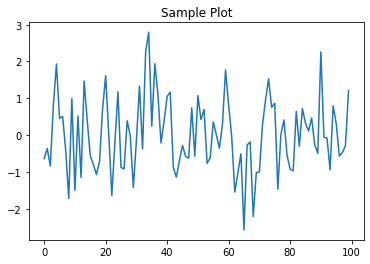

In [87]:
y = np.random.randn(100)
x = [x for x in range(len(y))]

plt.plot(x, y,  '-')
plt.fill_between(x, y, 200, where=(y > 195), facecolor = 'g', alpha = 0.6)
plt.title("Sample Plot")
plt.show()

In [73]:
type(df_reduzida.idioma.unique())

numpy.ndarray

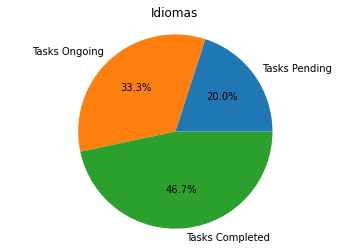

In [75]:
Tasks = [300,500,700]

my_labels = 'Tasks Pending','Tasks Ongoing','Tasks Completed'
plt.pie(Tasks,labels=my_labels,autopct='%1.1f%%')
plt.title('Idiomas')
plt.axis('equal')
plt.show()

## Tratamento de Dados

De acordo com os achados apresentados anteriormente, as colunas *usuario*, *lugar*, *pais* e *sigla*. Por conta da natureza dos atributos, *latitude* e *longitude* serão mantidos como estão para uma análise posterior.

A seguir, temos o preenchimento de dados aplicados somente nas colunas *usuario*, *lugar*, *pais* e *sigla*. 

In [8]:
df_original['usuario'] = df_original['usuario'].fillna('')
df_original['lugar'] = df_original['lugar'].fillna('Não Informado')
df_original['pais'] = df_original['pais'].fillna('Não Informado')
df_original['sigla'] = df_original['sigla'].fillna('Não Informado')

Em uma busca manual, foi conferido que existem tweets repetidos. Para tanto, foi aplicada a função de remoção de linhas duplicadas.

In [59]:
df_reduzida = pd.DataFrame.drop_duplicates(df_original)
print('Foram removidas', qntd_linhas - df_reduzida.shape[0], 'linhas.')
print('Quantidade atual de linhas:', df_reduzida.shape[0], '.')

Foram removidas 2 linhas.
Quantidade atual de linhas: 1658823


A remoção da linhas duplicadas mostra que haviam 3 tweets iguais no dataset. Somente uma delas permaneceu no dataset.

In [ ]:
df_original = df_original.rename(columns = {'Data':'data','Usuario':'nome_perfil', 'Apelido':'username', 'Texto':'tweet', 'Retweet':'qntd_retweet', 'Seguidores':'qntd_seguidores', 'Idioma':'idioma', 'Lugar':'lugar', 'Pais':'pais', 'Sigla':'sigla_pais', 'Latitude':'lat', 'Longitude':'long', 'Hashtags':'hashtags'})

Ainda na busca manual, foi percebido que existem tweets em línguas estrangeiras que com o valor **pt** na coluna idioma. Faz-se necessária a criação de uma outra coluna, **idioma_detectado**, com os reais idiomas do tweet. 

In [11]:
#criação de uma coluna extra, para armazenar o idioma correto dos tweets
df_original['idioma_detectado'] = ''

In [85]:
df_reduzida.loc[72994]

data                                        2020-06-30 13:00:02
usuario                                            UERJ Oficial
apelido                                            UERJ_oficial
texto         A cartilha Relações Interpessoais e Isolamento...
retweet                                                       6
seguidores                                                24075
idioma                                                       pt
lugar                                                       NaN
pais                                                        NaN
sigla                                                       NaN
latitude                                                    NaN
longitude                                                   NaN
hashtags                                                     []
Name: 72994, dtype: object

##Classificação de Temas